In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Credit_Card_Applications.csv')
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)

In [5]:
from minisom import MiniSom

In [6]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [7]:
som.random_weights_init(x_scaled)

In [8]:
som.train_random(data=x_scaled, num_iteration=200)

Visualizing the som

In [9]:
from pylab import bone,pcolor,colorbar,plot,show

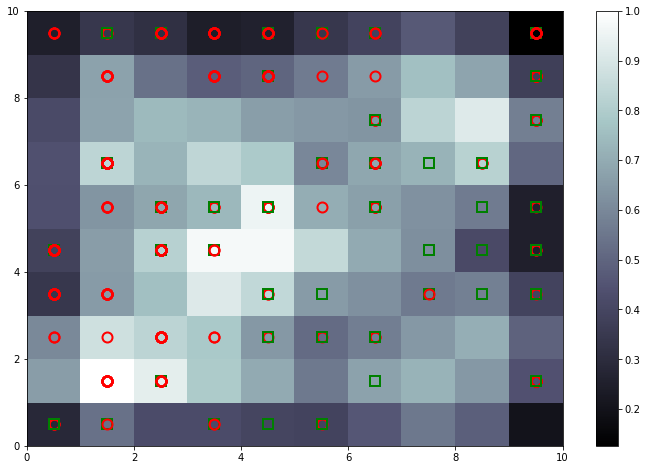

In [13]:
plt.figure(figsize=(12,8))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(x_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [51]:
mappings=som.win_map(x_scaled)


In [52]:
frauds=np.concatenate((mappings[(1,1)],mappings[(3,4)],mappings[(4,5)]),axis=0)


In [53]:
list_of_frauds=scaler.inverse_transform(frauds)


In [33]:
fraud_data=pd.DataFrame(list_of_frauds)

In [27]:
customer=data.iloc[:,1:].values

In [29]:
# Creating numpy array with all values zeros
is_fraud=np.zeros(len(customer))


In [37]:
# Creating numpy array with data of fraud customer id as 1

for i in range(data.shape[0]):
    if data.iloc[i,0] in list_of_frauds:
        is_fraud[i]=1
        
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Predicting The Fradualent Practices

In [39]:
scaler_ann=MinMaxScaler(feature_range=(0,1))
customer_1=scaler_ann.fit_transform(customer)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
classifier =  Sequential()
classifier.add(Dense(units=10, input_dim=customer_1.shape[1],activation='relu'))
classifier.add(Dense(units=10, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [43]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
classifier.fit(customer_1,is_fraud,epochs=10,batch_size=10)

Epoch 1/10
69/69 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.5246
Epoch 2/10
69/69 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.9478
Epoch 3/10
69/69 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.9478
Epoch 4/10
69/69 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.9478
Epoch 5/10
69/69 [==============================] - 0s 4ms/step - loss: 0.2053 - accuracy: 0.9478
Epoch 6/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9478
Epoch 7/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.9478
Epoch 8/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1809 - accuracy: 0.9478
Epoch 9/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9478
Epoch 10/10
69/69 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.9478


In [45]:
predictions=classifier.predict(customer_1)

In [47]:
# Creating Dataset with probability of frauds in Customer provided info.
fraud_pred=pd.DataFrame()
fraud_pred['Customer_ID']=data.iloc[:,0]
fraud_pred['Probability']=predictions

In [50]:
# arranging the dataset with max probability of customer frauds.
fraud_pred.sort_values(by='Probability',ascending=False)

,Customer_ID,Probability
214,15623210,0.291069
469,15627328,0.263008
411,15752344,0.256429
176,15638983,0.254120
528,15611409,0.236703
...,...,...
325,15810723,0.007849
358,15570947,0.007706
305,15764444,0.007693
267,15762716,0.007151
